## Declare Parameters

In [6]:
import sympy as sp
sp.init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
j, tau_theta, tau_delta, tau_epsilon, tau_u, tau_s, z_1, z, gamma = sp.symbols('j, tau_theta, tau_delta, tau_epsilon, tau_u, tau_s, z_1, z, gamma')

## Proprietary Cost

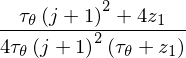

In [8]:
proprietary_cost = ((j + 1) ** 2 * tau_theta + 4 * z_1) / (4 * (j + 1) ** 2 * tau_theta * (tau_theta + z_1))
proprietary_cost

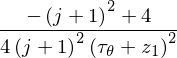

In [9]:
proprietary_cost_diff_1 = sp.simplify(sp.diff(proprietary_cost, z_1))
proprietary_cost_diff_1

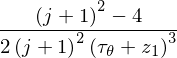

In [10]:
proprietary_cost_diff_2 = sp.simplify(sp.diff(proprietary_cost_diff_1, z_1))
proprietary_cost_diff_2

## Price Informativeness

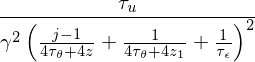

In [11]:
price_informativeness = tau_u / (gamma ** 2 * (1 / (4 * (z_1 + tau_theta))
                                              + ((j - 1) / (4 * (z + tau_theta)))
                                              + (1 / tau_epsilon)) **2)
price_informativeness

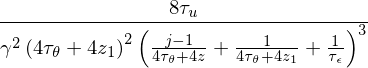

In [12]:
price_informativeness_diff_1 = sp.diff(price_informativeness, z_1)
price_informativeness_diff_1

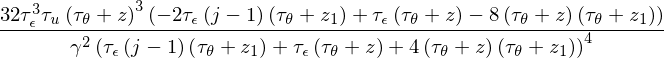

In [13]:
price_informativeness_diff_2 = sp.simplify(sp.diff(price_informativeness_diff_1, z_1))
price_informativeness_diff_2

## Non-Disclosure Equilibrium

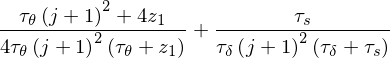

In [14]:
profit = (((j + 1) **2 * tau_theta + 4 * z_1) / (4 * (j + 1) ** 2 * tau_theta * (tau_theta + z_1))) + ((tau_s) / ((j + 1) ** 2 * tau_delta * (tau_s + tau_delta)))
profit

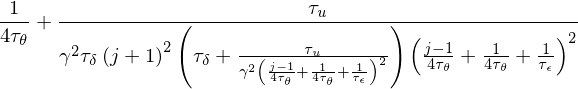

In [15]:
profit_0_0 = profit.subs(tau_s, price_informativeness).subs(z, 0).subs(z_1, 0)
profit_0_0

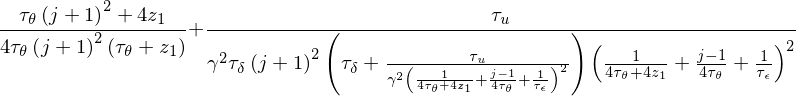

In [16]:
profit_z1_0 = profit.subs(tau_s, price_informativeness).subs(z, 0)
profit_z1_0

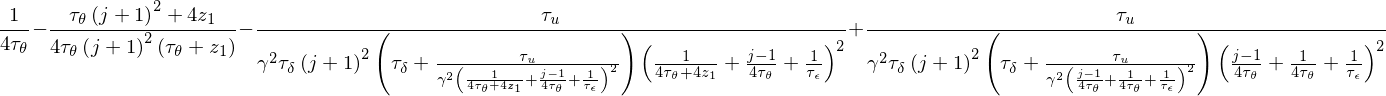

In [17]:
compare = sp.simplify(profit_0_0 - profit_z1_0)
compare

In [18]:
compare_numerator, compare_denominator = sp.cancel(compare).as_numer_denom()

In [19]:
sp.simplify(compare_numerator)

In [20]:
non_disclosure = sp.simplify(compare_numerator / z_1)
non_disclosure

In [21]:
sp.collect(non_disclosure, z_1)

In [22]:
h = sp.Poly(- non_disclosure, z_1)
h.coeffs()

## Full Disclosure Equilibrium

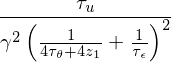

In [23]:
price_informativeness_z1_infty = tau_u / (gamma ** 2 * (1 / (4 * (z_1 + tau_theta))
                                              + (1 / tau_epsilon)) **2)
price_informativeness_z1_infty

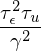

In [24]:
price_informativeness_infty_infty = tau_u / (gamma ** 2 * ((1 / tau_epsilon)) **2)
price_informativeness_infty_infty

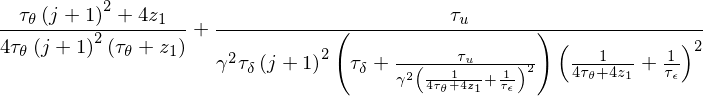

In [25]:
profit_z1_infty = profit.subs(tau_s, price_informativeness_z1_infty)
profit_z1_infty

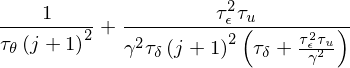

In [26]:
profit_infty_infty = ((1 / ((j + 1) **2 * tau_theta)) + (tau_s) / ((j + 1) ** 2 * tau_delta * (tau_s + tau_delta))).subs(tau_s, price_informativeness_infty_infty)
profit_infty_infty

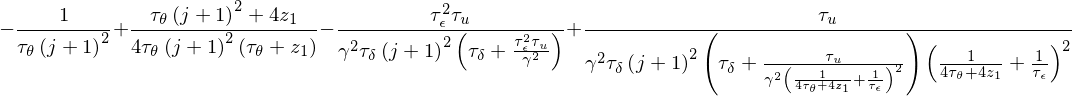

In [27]:
compare = sp.simplify(profit_z1_infty - profit_infty_infty)
compare

In [28]:
compare_numerator, compare_denominator = sp.cancel(compare).as_numer_denom()

In [29]:
sp.simplify(compare_numerator)

In [30]:
sp.collect(compare_numerator, z_1)

In [31]:
k = sp.Poly(compare_numerator, z_1)
k.coeffs()

## Partial Disclosure Equilibrium

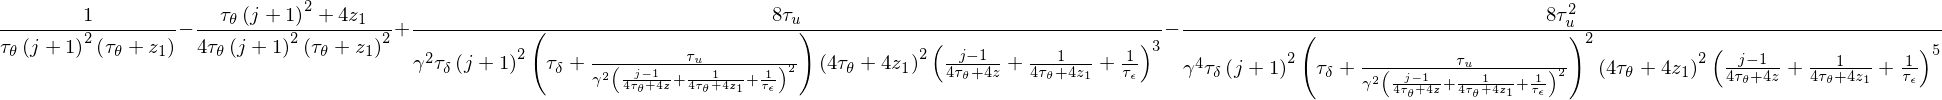

In [32]:
profit_diff = sp.diff(profit.subs(tau_s, price_informativeness), z_1)
profit_diff

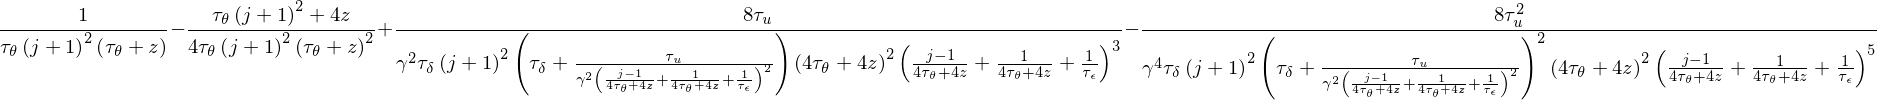

In [33]:
profit_diff.subs(z_1, z)

## Illustrative Figure

In [236]:
nondisclosure_matrix = np.zeros((61, 51), dtype=int)
for i1 in range(1, 61):
    for i2 in range(1, 51):
        h0 = h.coeffs()[2].subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04)])
        h1 = h.coeffs()[1].subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04)])
        h2 = h.coeffs()[0].subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04)])
        if ((h1 > 0) & (h2 < 0) & (h1 ** 2 - 4 * h0 * h2 < 0)) | ((h1 <= 0) & (h2 <= 0) & (h0 <= 0)):
            nondisclosure_matrix[i1, i2] = 1

In [237]:
nondisclosure_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]])

In [238]:
fulldisclosure_matrix = np.zeros((61, 51), dtype=int)
for i1 in range(1, 61):
    for i2 in range(1, 51):
        k0 = k.coeffs()[2].subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04)])
        k1 = k.coeffs()[1].subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04)])
        k2 = k.coeffs()[0].subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04)])
        if ((k1 > 0) & (k2 < 0) & (k1 ** 2 - 4 * k0 * k2 < 0)) | ((k1 <= 0) & (k2 <= 0) & (k0 <= 0)):
            fulldisclosure_matrix[i1, i2] = 1

In [239]:
fulldisclosure_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [240]:
price_informativeness_infty_z = tau_u / (gamma ** 2 * ((j - 1) / (4 * (z + tau_theta))
                                              + (1 / tau_epsilon)) **2)
profit_infty_z = ((1 / ((j + 1) **2 * tau_theta)) + (tau_s) / ((j + 1) ** 2 * tau_delta * (tau_s + tau_delta)))

partialdisclosure_matrix = np.zeros((61, 51), dtype=int)
for i1 in range(1, 61):
    for i2 in range(1, 51):
        temp = sp.solveset(profit_diff.subs(z_1, z).subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04)]), z, domain = sp.S.Reals).args
        cand = [i3 for i3 in temp if i3 > 0]
        if len(cand) > 0:
            for i4 in cand:
                cand_temp = sp.solveset(profit_diff.subs(z, i4).subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04)]), z_1, domain = sp.S.Reals).args
                cand_cand = [i5 for i5 in cand_temp if i5 > 0]
                cand_profit = profit.subs(tau_s, price_informativeness).subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04), (z, i4), (z_1, i4)])
                cand_cand_profit = [profit.subs(tau_s, price_informativeness).subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04), (z, i4), (z_1, i6)]) for i6 in cand_cand]
                cand_cand_profit.append(profit.subs(tau_s, price_informativeness).subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04), (z, i4), (z_1, 0)]))
                cand_cand_profit.append(profit_infty_z.subs(tau_s, price_informativeness_infty_z).subs([(j, 2), (gamma, 50), (tau_theta, 2), (tau_epsilon, 100), (tau_u, i1 * 5), (tau_delta, i2 * 0.04), (z, i4)]))
                if cand_profit.evalf(10) >= np.max(cand_cand_profit).evalf(10):
                    partialdisclosure_matrix[i1, i2] = 1
                    break
        
        
        
        

In [241]:
partialdisclosure_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

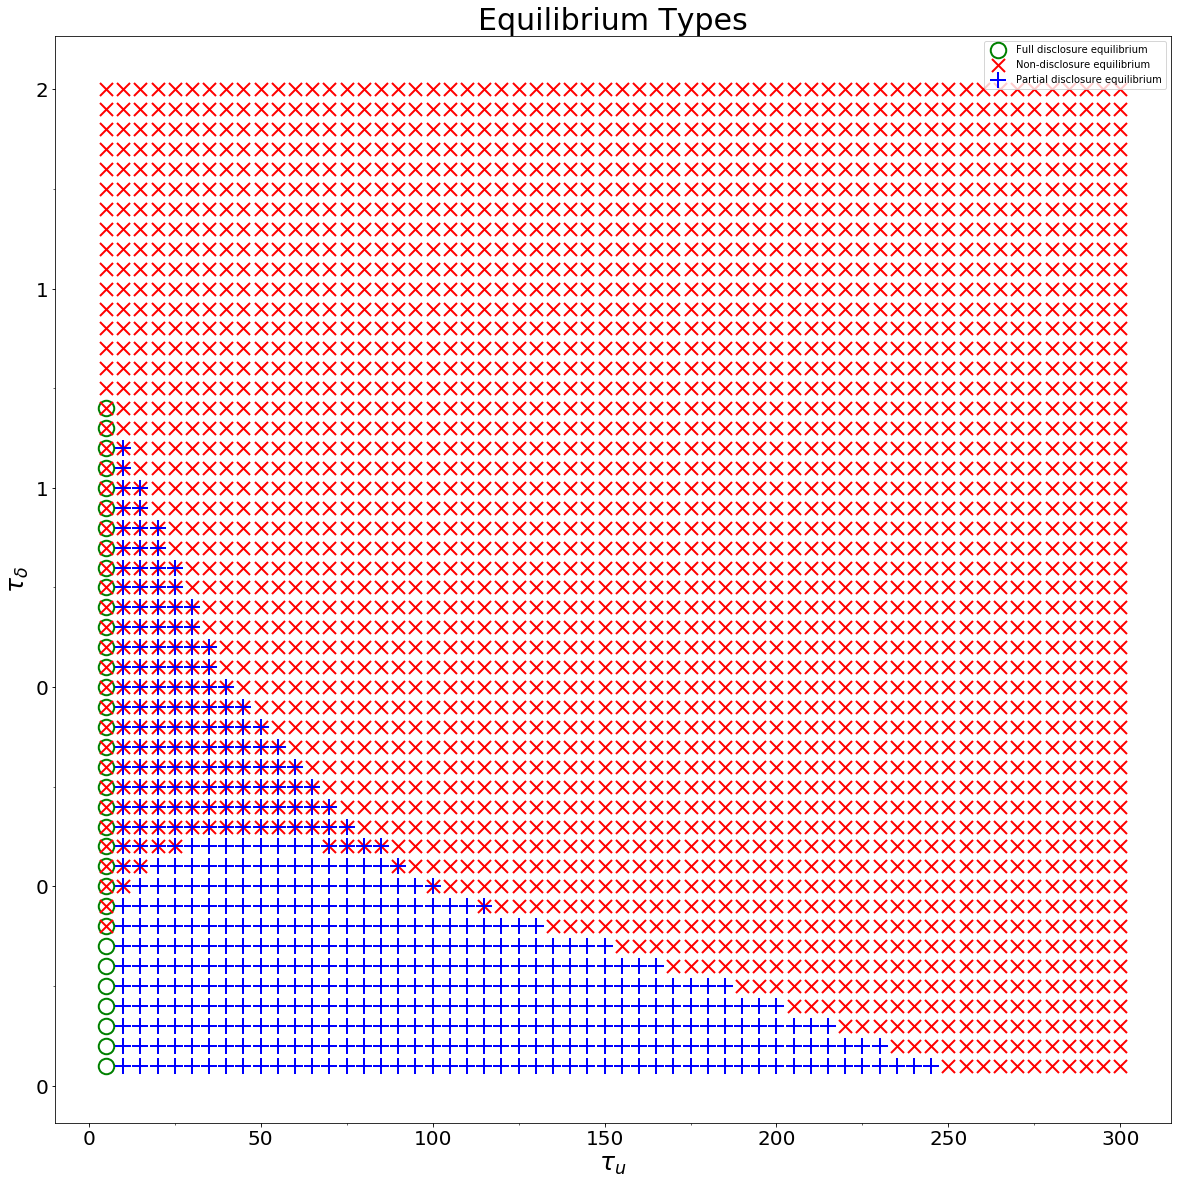

In [272]:
# First create a grid of plots
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(20, 20))

# Call plot() method on the appropriate object
ax.scatter(fulldisclosure_matrix.nonzero()[0], fulldisclosure_matrix.nonzero()[1],
           marker = 'o', s = 240, edgecolor='green', linewidth=2, facecolor='white', label='Full disclosure equilibrium')
ax.scatter(nondisclosure_matrix.nonzero()[0], nondisclosure_matrix.nonzero()[1],
           marker = 'x', s = 170, linewidth=2, facecolor = 'red', label='Non-disclosure equilibrium')
ax.scatter(partialdisclosure_matrix.nonzero()[0], partialdisclosure_matrix.nonzero()[1],
           marker = '+', s = 240, linewidth=2, facecolor = 'blue', label='Partial disclosure equilibrium')
ax.set_xlabel(r'$\tau_u$', fontsize = 25)
ax.set_ylabel(r'$\tau_\delta$', fontsize = 25)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick_number: int(5 * value)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick_number: int(0.04 * value)))
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.legend()
ax.set_title('Equilibrium Types', fontsize = 30);

## Competition and Welfare

In [37]:
nondisclosure_vector = np.zeros(39, dtype=int)
for i in range(2, 41):
    h0 = h.coeffs()[2].subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01)])
    h1 = h.coeffs()[1].subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01)])
    h2 = h.coeffs()[0].subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01)])
    if ((h1 > 0) & (h2 < 0) & (h1 ** 2 - 4 * h0 * h2 < 0)) | ((h1 <= 0) & (h2 <= 0) & (h0 <= 0)):
        nondisclosure_vector[i - 2] = 1

In [39]:
nondisclosure_vector

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
fulldisclosure_vector = np.zeros(39, dtype=int)
for i in range(2, 41):
    k0 = k.coeffs()[2].subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01)])
    k1 = k.coeffs()[1].subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01)])
    k2 = k.coeffs()[0].subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01)])
    if ((k1 > 0) & (k2 < 0) & (k1 ** 2 - 4 * k0 * k2 < 0)) | ((k1 <= 0) & (k2 <= 0) & (k0 <= 0)):
        fulldisclosure_vector[i - 2] = 1

In [41]:
fulldisclosure_vector

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
price_informativeness_infty_z = tau_u / (gamma ** 2 * ((j - 1) / (4 * (z + tau_theta))
                                              + (1 / tau_epsilon)) **2)
profit_infty_z = ((1 / ((j + 1) **2 * tau_theta)) + (tau_s) / ((j + 1) ** 2 * tau_delta * (tau_s + tau_delta)))

partialdisclosure_vector = np.zeros(39)
for i in range(2, 41):
    temp = sp.solveset(profit_diff.subs(z_1, z).subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01)]), z, domain = sp.S.Reals).args
    cand = [i3 for i3 in temp if i3 > 0]
    if len(cand) > 0:
        for i4 in cand:
            cand_temp = sp.solveset(profit_diff.subs(z, i4).subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01)]), z_1, domain = sp.S.Reals).args
            cand_cand = [i5 for i5 in cand_temp if i5 > 0]
            cand_profit = profit.subs(tau_s, price_informativeness).subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01), (z, i4), (z_1, i4)])
            cand_cand_profit = [profit.subs(tau_s, price_informativeness).subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01), (z, i4), (z_1, i6)]) for i6 in cand_cand]
            cand_cand_profit.append(profit.subs(tau_s, price_informativeness).subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01), (z, i4), (z_1, 0)]))
            cand_cand_profit.append(profit_infty_z.subs(tau_s, price_informativeness_infty_z).subs([(j, i), (gamma, 50), (tau_theta, i), (tau_epsilon, 100), (tau_u, 5), (tau_delta, 0.01), (z, i4)]))
            if cand_profit.evalf(10) >= np.max(cand_cand_profit).evalf(10):
                partialdisclosure_vector[i - 2] = i4
                break
        
        
        
 

In [92]:
partialdisclosure_vector

array([  0.        , 368.77739244,  86.14254492,  50.96481796,
        35.71838487,  26.42526189,  19.66086739,  14.10283315,
         8.98899398,   3.09869115,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

In [93]:
def fnz(x):
    return x / (x + 1)

def fntaus(x):
    i, val = x
    return price_informativeness.subs([(z, val), (z_1, val), (j, i + 2), (gamma, 50), (tau_u, 5), (tau_epsilon, 100), (tau_theta, i + 2)])



In [94]:
outcome1 = np.fromiter(map(fnz, partialdisclosure_vector), dtype = float)
outcome1[0] = 1
outcome2 = np.fromiter(map(fntaus, enumerate(partialdisclosure_vector)), dtype = float)
outcome2[0] = price_informativeness_infty_infty.subs([(gamma, 50), (tau_u, 5), (tau_epsilon, 100)])

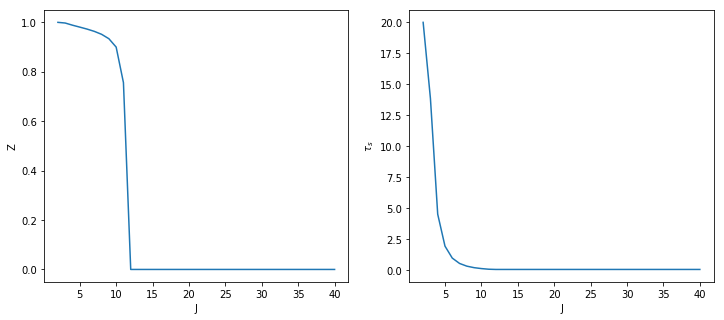

In [95]:
# First create a grid of plots
# ax will be an array of Axes objects
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Call plot() method on the appropriate object
ax[0].plot([i + 2 for i, val in enumerate(outcome1)], outcome1)
ax[1].plot([i + 2 for i, val in enumerate(outcome2)], outcome2)
ax[0].set_xlabel('J')
ax[0].set_ylabel('Z')
ax[1].set_xlabel('J')
ax[1].set_ylabel(r'$\tau_s$');

## Noise Trading and Price Informativeness

In [68]:
nondisclosure_vector = np.zeros(51, dtype=int)
for i in range(0, 51):
    h0 = h.coeffs()[2].subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01)])
    h1 = h.coeffs()[1].subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01)])
    h2 = h.coeffs()[0].subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01)])
    if ((h1 > 0) & (h2 < 0) & (h1 ** 2 - 4 * h0 * h2 < 0)) | ((h1 <= 0) & (h2 <= 0) & (h0 <= 0)):
        nondisclosure_vector[i] = 1

In [69]:
nondisclosure_vector

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [70]:
fulldisclosure_vector = np.zeros(51, dtype=int)
for i in range(0, 51):
    k0 = k.coeffs()[2].subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01)])
    k1 = k.coeffs()[1].subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01)])
    k2 = k.coeffs()[0].subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01)])
    if ((k1 > 0) & (k2 < 0) & (k1 ** 2 - 4 * k0 * k2 < 0)) | ((k1 <= 0) & (k2 <= 0) & (k0 <= 0)):
        fulldisclosure_vector[i] = 1

In [71]:
fulldisclosure_vector

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [79]:
price_informativeness_infty_z = tau_u / (gamma ** 2 * ((j - 1) / (4 * (z + tau_theta))
                                              + (1 / tau_epsilon)) **2)
profit_infty_z = ((1 / ((j + 1) **2 * tau_theta)) + (tau_s) / ((j + 1) ** 2 * tau_delta * (tau_s + tau_delta)))

partialdisclosure_vector = np.zeros(51)
for i in range(0, 51):
    temp = sp.solveset(profit_diff.subs(z_1, z).subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01)]), z, domain = sp.S.Reals).args
    cand = [i3 for i3 in temp if i3 > 0]
    if len(cand) > 0:
        for i4 in cand:
            cand_temp = sp.solveset(profit_diff.subs(z, i4).subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01)]), z_1, domain = sp.S.Reals).args
            cand_cand = [i5 for i5 in cand_temp if i5 > 0]
            cand_profit = profit.subs(tau_s, price_informativeness).subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01), (z, i4), (z_1, i4)])
            cand_cand_profit = [profit.subs(tau_s, price_informativeness).subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01), (z, i4), (z_1, i6)]) for i6 in cand_cand]
            cand_cand_profit.append(profit.subs(tau_s, price_informativeness).subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01), (z, i4), (z_1, 0)]))
            cand_cand_profit.append(profit_infty_z.subs(tau_s, price_informativeness_infty_z).subs([(j, 5), (gamma, 50), (tau_theta, 5), (tau_epsilon, 100), (tau_u, i), (tau_delta, 0.01), (z, i4)]))
            if cand_profit.evalf(10) >= np.max(cand_cand_profit).evalf(10):
                partialdisclosure_vector[i] = i4
                break
        
        
        
 

In [80]:
partialdisclosure_vector

array([0.00000000e+00, 0.00000000e+00, 4.33147923e+02, 1.29125567e+02,
       7.40455113e+01, 5.09648180e+01, 3.82744754e+01, 3.02471406e+01,
       2.47114438e+01, 2.06630253e+01, 1.75733841e+01, 1.51379007e+01,
       1.31686399e+01, 1.15433639e+01, 1.01791314e+01, 9.01768144e+00,
       8.01688890e+00, 7.14554007e+00, 6.38001460e+00, 5.70210875e+00,
       5.09756696e+00, 4.55506643e+00, 4.06549982e+00, 3.62145867e+00,
       3.21685487e+00, 2.84663902e+00, 2.50658801e+00, 2.19314259e+00,
       1.90328183e+00, 1.63442507e+00, 1.38435449e+00, 1.15115350e+00,
       9.33157266e-01, 7.28912657e-01, 5.37145626e-01, 3.56734426e-01,
       1.86687499e-01, 2.61250998e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [81]:
def fnz(x):
    return x / (x + 1)

def fntaus(x):
    i, val = x
    return price_informativeness.subs([(z, val), (z_1, val), (j, i + 2), (gamma, 50), (tau_u, 5), (tau_epsilon, 100), (tau_theta, i + 2)])


In [82]:
outcome1 = np.fromiter(map(fnz, partialdisclosure_vector), dtype = float)
outcome1[1] = 1
outcome2 = np.fromiter(map(fntaus, enumerate(partialdisclosure_vector)), dtype = float)
outcome2[1] = price_informativeness_infty_infty.subs([(gamma, 50), (tau_u, 2), (tau_epsilon, 100)])

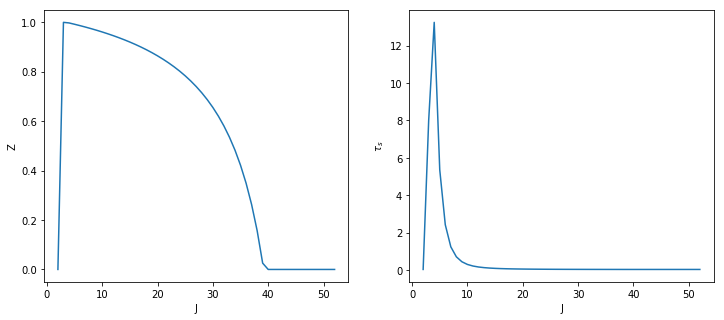

In [90]:
# First create a grid of plots
# ax will be an array of Axes objects
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Call plot() method on the appropriate object
ax[0].plot([i + 2 for i, val in enumerate(outcome1)], outcome1)
ax[1].plot([i + 2 for i, val in enumerate(outcome2)], outcome2)
ax[0].set_xlabel('J')
ax[0].set_ylabel('Z')
ax[1].set_xlabel('J')
ax[1].set_ylabel(r'$\tau_s$');